# SurfAnalysis - example
# Basic Mapping and plotting
This is a example of how to map volumes to the surface and to plot the result on a flat map using the the SurfAnalysisPy toolbox. 

In [1]:
# Import the necesarry modules for this example 
import surfAnalysisPy as surf
import numpy as np
import nibabel as nb
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Define the file names with paths used in this example: 
# 1. Functional file 
s02func = os.path.join('surfAnalysisPy','example_individual','con_TOM-average_4.nii')
# 2. Define the relevant gifti files for both left and right hemisphere:
s02white = [] # White -gray matter surface 
s02pial = []  # Pial surface 
s02sulc = []  # Sulcal depth 
flatsurf = [] # Flat surface 
hemN = ['L','R']
for h,hem in enumerate(hemN):   
    s02white.append(os.path.join('surfAnalysisPy','example_individual','s02.' + hem + '.white.32k.surf.gii'))
    s02pial.append(os.path.join('surfAnalysisPy','example_individual','s02.' + hem + '.pial.32k.surf.gii'))
    s02sulc.append(os.path.join('surfAnalysisPy','example_individual','s02.' + hem + '.sulc.32k.shape.gii'))
    flatsurf.append(os.path.join('surfAnalysisPy','standard_mesh','fs_' + hem,'fs_LR.32k.' + hem + '.flat.surf.gii'))

## Mapping of volumes to surface
Description

In [3]:
# Map a Nifti to the surface of left hemisphere 
DL = surf.map.vol_to_surf([s02func],s02pial[0],s02white[0])
# Map a Nifti to the surface of right hemisphere 
DR = surf.map.vol_to_surf([s02func],s02pial[1],s02white[1])

## Plotting flat surfaces
The data can then be plotted a color map using a flatmap 

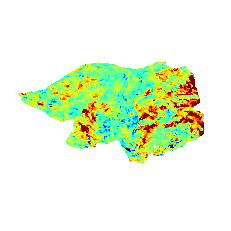

In [4]:
fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1 = surf.plot.plotmap(DL,flatsurf[0],cscale = [-2,2])
plt.show()

## Advanced options
Sizing of the Figures and Plots can be achieved using matplot lib to defined axes.
surf.plot always plots to the active subplot - and respects the overall figure and subplot sizing.  
If we set the threshold to -1,1 only the activity that exceeds the this negative and positive threshold. Places below these threshold show the underlay map - here the sulcal depth. 
 

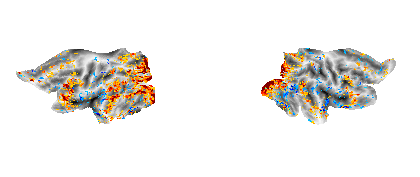

In [6]:
fig = plt.figure(figsize=(8,3))
ax2 = fig.add_subplot(121, projection='3d')
ax2 = surf.plot.plotmap(DL,flatsurf[0],underlay = s02sulc[0],cscale = [-3,3],threshold= [-1,1])
ax3 = fig.add_subplot(122, projection='3d')
ax3 = surf.plot.plotmap(DR,flatsurf[1],underlay = s02sulc[1],cscale = [-3,3],threshold= [-1,1])
plt.show()